In [ ]:
# y'' + 5y' + 6y = 0
    # given that y = e^(rx), so y' = r*e^(rx) and y'' = r^2*e^(rx) 
# Then substitue --> r^2*e^(rx) + 5r^2*e^(rx) + 6e^(rx) = 0
    # (r^2 + 5r + 6)*e^(rx) = 0
    # ((r^2 + 5r + 6)*e^(rx)) / 0 = 0
    ## (r^2 + 5r + 6) = 0 --> (r + 2)(r + 3) --> r = -2 or -3
    ## y = c_1*e^(-2x) or y = c_2*e^(-3x)
# y = c_1*e^(-2x) + c_2*e^(-3x)

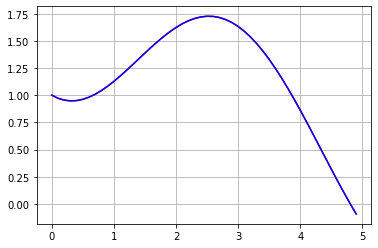

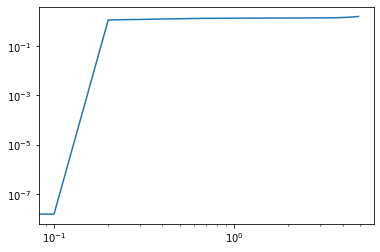

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_1d (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax)

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0

    # now compute the range using the Runge-Kutta formalism
    for i in range (1, len(x)):
        k1 = h * f (x[i-1], y[i-1])
        k2 = h * f (x[i-1] + h/2, y[i-1] + k1/2)
        k3 = h * f (x[i-1] + h/2, y[i-1] + k2/2)
        k4 = h * f (x[i-1] + h, y[i-1] + k3)
        delta_y = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x[i] = x[i-1] + h
        y[i] = y[i-1] + delta_y

    # return the solution
    return x, y

def main():
    # define your function f(x, y) as a lambda function
    # specify x even if x does not show up in f(x, y)
    f = lambda x, y: -(1/3)*y + np.sin(x)

    # specify the initial conditions
    x0 = 0
    y0 = 1

    # specify the max in your domain
    xmax = 10

    # specify the increment in x
    dx = 0.1

    # get the solution of the differential equation
    x, y = rk4_1d (f, x0, y0, xmax, dx)

    # display the  numerical solution
    plt.plot (x, y, 'red')

    # for the vector (domain) x get the analytical range y_actual
    y_actual = (1/10) * (19 * np.exp(-x/3) + 3 * np.sin(x) - 9 * np.cos(x))

    # display the analytical solution
    plt.plot (x, y_actual, 'blue')

    plt.grid()
    plt.show()

    # estimate the error of your numerical solution
    # obtain the root-mean-square of your residuals (y - y_actual)
    dx_store = [x*0.1 for x in range(50)]
    std_store = []
    
    for dx in dx_store:
        x, y = rk4_1d (f, x0, y0, xmax, dx)
        temp = np.sqrt(np.mean((y - y_actual)**2))
        std_store.append(temp)
    plt.loglog(dx_store, std_store)

    # print both dx and std to the same precision for comparison

main()

In [2]:
# for a damped oscillator:
    # F = -kx
    # ma = -kx such that d^2x/dt^2 = -k/m * x
    # x = Acos(Ωt)
    # Ω^2 = k/m
# d^2x/dt^2 = - Ω^2 * x
    # | dx/dt = v, dv/dt = Ω^2 * x |
# ex: t = 0, x_0 = 1, Ω = 1, v_0 = 0
    # x = x = Acos(Ωt)
    # x _k+1 = x_k + v_k * ∆t
    # v_k+1 = v_k - Ω^2 * x_k * ∆t

In [3]:
def euler_1d (f, x0, y0, xmax, h): 
    # set up the domain of the function between x0, xmax, and h
    x = np.linspace(x0, xmax)

    # zero out the range of the function for the given domain
    y = np.zeros_like (x)

    # fill in the initial conditions
    x[0] = x0
    y[0] = y0

    # now compute the range using Euler's approximation
    for i in range (1, len(x)):
        x[i] = x[i-1] + h
        y[i] = y[i-1] + h*f(x[i-1], y[i-1])

    # return the solution
    return x, y

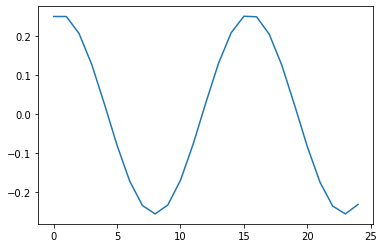

In [13]:
f = lambda w, x: 0.25 * np.cos(w*x)
f_prime = lambda v: v 
f_double_prime = lambda w, x: -w**2 * x
F = [f, f_prime, f_double_prime]
x0 = 0
x_max = 10
w = 1
k = 25

def euler (F, w, x0, x_max, k):    
    # time interval 
    x = np.linspace(x0, x_max, k)
    y = np.zeros_like (x)
    v = np.zeros_like (x)
    
    # movement 
    y[0] = F[0](w, x0)
    v[0] = F[1](x0)
    
    for i in range(1, k):
        y[i] = y[i-1] + (x[i] - x[i-1]) * v[i-1]
        v[i] = v[i-1] + (x[i] - x[i-1]) * F[2](w, y[i])
     
    return(y)

temp = euler (F, w, x0, x_max, k)
x = np.linspace(x0, x_max)
plt.plot(temp)

In [ ]:
# equations to solve 
    # y_k+1 = y_k + (x_k+1 - x_k) * v_k  initial conditions (x0, y0)
    # v_k+1 = v_k + (x_k+1 - x_k) * f(x_k, y_k, v_k) initial conditions (x0, y'0)

# d^2x/dt^2 = - Ω^2 * x
    # | dx/dt = v, dv/dt = Ω^2 * x |
        # y' = v, v' = y'' = Ω^2 * x
    # d^2x/dt^2 = y'' = v' = f(x, y, v) = f(x, y, y')
# ex: t = 0, x_0 = 1, Ω = 1, v_0 = 0
    # x = x = Acos(Ωt)
    # x_k+1 = x_k + v_k * ∆t
    # v_k+1 = v_k - Ω^2 * x_k * ∆t
# w = k/m
# y' = v
# v' = Ω^2 * x